<a href="https://colab.research.google.com/github/aaditkamat/analytics-projects/blob/main/Chess_Players.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
chess_df = pd.read_csv('top_chess_players.csv')
chess_df.head()

,Title,Player,Rating | Ranking,Federation
0,GM,Magnus Carlsen,2830 | #1,Norway
1,GM,Fabiano Caruana,2804 | #2,United States
2,GM,Hikaru Nakamura,2788 | #3,United States
3,GM,Ding Liren,2780 | #4,China
4,GM,Alireza Firouzja,2759 | #5,France


In [52]:
chess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             1062 non-null   object
 1   Player            1071 non-null   object
 2   Rating | Ranking  1047 non-null   object
 3   Federation        1071 non-null   object
dtypes: object(4)
memory usage: 33.6+ KB


In [53]:
chess_df['Rating'] = chess_df.loc[~chess_df['Rating | Ranking'].isna(), 'Rating | Ranking'].apply(lambda row: int(row.split(' | ')[0]))
chess_df['Ranking'] = chess_df.loc[~chess_df['Rating | Ranking'].isna(), 'Rating | Ranking'].apply(lambda row: row.split(' | ')[1])
chess_df.head()

,Title,Player,Rating | Ranking,Federation,Rating,Ranking
0,GM,Magnus Carlsen,2830 | #1,Norway,2830.0,#1
1,GM,Fabiano Caruana,2804 | #2,United States,2804.0,#2
2,GM,Hikaru Nakamura,2788 | #3,United States,2788.0,#3
3,GM,Ding Liren,2780 | #4,China,2780.0,#4
4,GM,Alireza Firouzja,2759 | #5,France,2759.0,#5


In [54]:
def find_nulls(df):
  for col in df.columns:
    null_values = chess_df.loc[chess_df[col].isna(), :]
    if null_values.size > 0:
       print(null_values)

In [55]:
# We use the forward fill strategy to fill the values in the data frame because the rating, ranking and title
# of chess players for the rows with missing values are likely to be similar to the ones that have been
# filled in earlier rows, because the rows are sorted based on rating/ranking and titles are also based
# on rating
chess_df = chess_df.ffill(axis=0)
chess_df.info()
find_nulls(chess_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Title             1071 non-null   object 
 1   Player            1071 non-null   object 
 2   Rating | Ranking  1071 non-null   object 
 3   Federation        1071 non-null   object 
 4   Rating            1071 non-null   float64
 5   Ranking           1071 non-null   object 
dtypes: float64(1), object(5)
memory usage: 50.3+ KB


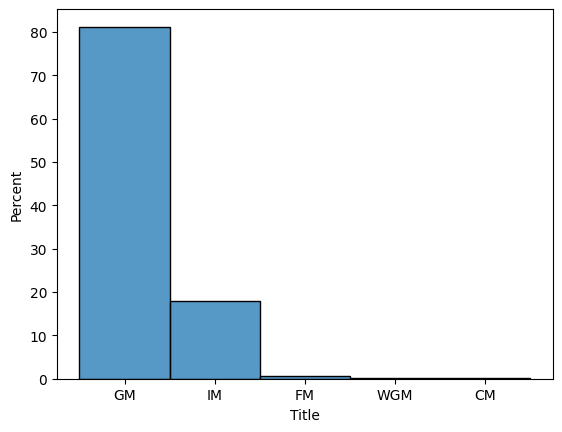

In [83]:
fig, ax = plt.subplots()
sns.histplot(chess_df, x='Title', stat='percent', ax=ax)
plt.show()

80% of the top chess players are grandmasters and most others are international masters. There are also a few FIDE masters.

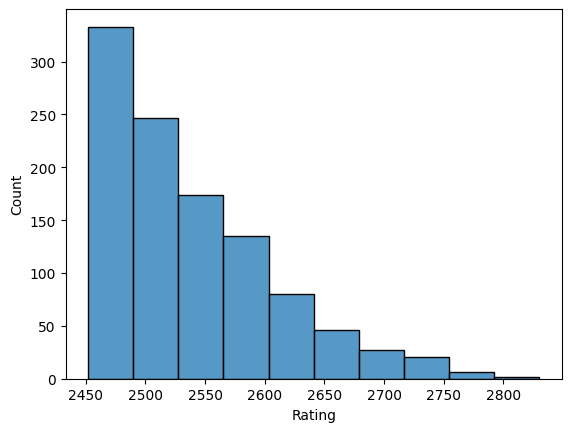

In [57]:
fig, ax = plt.subplots()
sns.histplot(chess_df['Rating'], ax=ax, bins=10)
plt.show()

In [60]:
max_rating = chess_df.iloc[0, 4]
min_rating = chess_df.iloc[-1, 4]
max_rating, min_rating

(2830.0, 2452.0)

In [89]:
# Which countries have the highest average rating?
highest_avg_rating = chess_df.groupby('Federation')['Rating'].mean().sort_values(ascending=False)

([<matplotlib.patches.Wedge at 0x7c0033fa51b0>,
 [Text(0.882575772784834, 0.6565516013941731, 'United Arab Emirates'),
  Text(-0.3671228909925693, 1.0369285331734575, 'Uruguay'),
  Text(-1.099580278134168, -0.030384402880195373, 'Vietnam'),
  Text(-0.31662234942304335, -1.0534468604755687, 'Uzbekistan'),
  Text(0.8959649192241782, -0.6381589641457777, 'Armenia')],
 [Text(0.4814049669735458, 0.35811905530591254, '20.4%'),
  Text(-0.2002488496323105, 0.5655973817309767, '20.1%'),
  Text(-0.5997710608004552, -0.016573310661924745, '19.9%'),
  Text(-0.17270309968529637, -0.5746073784412192, '19.9%'),
  Text(0.4887081377586426, -0.3480867077158787, '19.7%')])

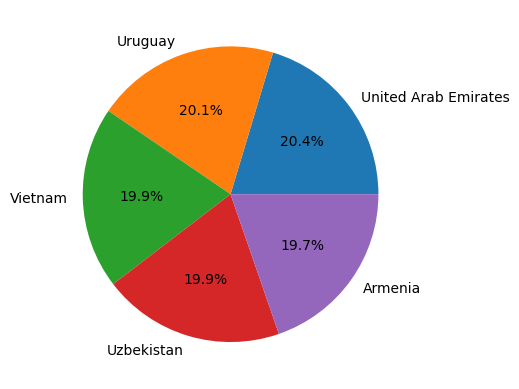

In [96]:
fig, ax = plt.subplots()
five_highest = highest_avg_rating.iloc[: 5]
ax.pie(five_highest, labels=five_highest.index, autopct='%1.1f%%')

The top 5 countries in terms of the average rating are UAE, Uruguay, Vietnam, Uzbekistan and Armenia.

In [81]:
# Which countries have the most number of GMs?
grouped_df = chess_df.groupby(['Federation', 'Title'])['Player'].count().reset_index()
grouped_df.loc[grouped_df['Title'] == 'GM', :].sort_values(by='Player', ascending=False)

,Federation,Title,Player
99,Russia,GM,56
59,India,GM,54
123,United States,GM,51
50,Germany,GM,46
24,China,GM,42
...,...,...,...
1,Andorra,GM,1
104,Singapore,GM,1
101,Scotland,GM,1
81,Morocco,GM,1


Russia, India and the US have the most number of chess grandmasters